In [1]:
!git clone https://github.com/xinychen/transdim.git

Cloning into 'transdim'...
remote: Enumerating objects: 227, done.
remote: Counting objects: 100% (227/227), done.
remote: Compressing objects: 100% (163/163), done.
remote: Total 2598 (delta 143), reused 135 (delta 62), pack-reused 2371
Receiving objects: 100% (2598/2598), 176.22 MiB | 30.87 MiB/s, done.
Resolving deltas: 100% (1567/1567), done.
Checking out files: 100% (168/168), done.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import os
import numpy as np
import warnings
import logging
import importlib
from sklearn.utils import check_array

#import required packages
from sklearn import neighbors
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# jupyter Notebook

#super_df =  pd.read_csv('./data/superdfi.csv', header=0, index_col=0)
#aux = super_df[(super_df['Sensor'] == 'sensor14v2.csv') | (super_df['Sensor'] == 'sensor13v2.csv') | (super_df['Sensor'] == 'sensor12v2.csv') | (super_df['Sensor'] == 'sensor11v2.csv') | (super_df['Sensor'] == 'sensor10v2.csv') | (super_df['Sensor'] == 'sensor9v2.csv') | (super_df['Sensor'] == 'sensor8v2.csv') | (super_df['Sensor'] == 'sensor7v2.csv') ]
#aux = super_df.copy(deep=True)

In [4]:
#Colab

super_df =  pd.read_csv('/content/drive/MyDrive/IMT Atlantique/Project_S5_Air/air-polution-sensor/data/superdfi.csv', header=0, index_col=0)
#aux = super_df[(super_df['Sensor'] == 'sensor14v2.csv') | (super_df['Sensor'] == 'sensor13v2.csv') | (super_df['Sensor'] == 'sensor12v2.csv') | (super_df['Sensor'] == 'sensor11v2.csv') | (super_df['Sensor'] == 'sensor10v2.csv') | (super_df['Sensor'] == 'sensor9v2.csv') | (super_df['Sensor'] == 'sensor8v2.csv') | (super_df['Sensor'] == 'sensor7v2.csv') ]
aux = super_df.copy(deep=True)

In [5]:
aux = pd.pivot_table(data=aux,values='PM2_MOY',index='Sensor',columns= ['Date', 'Hour'])
aux = aux.dropna(axis= 1)
columnst = aux.columns
indext = aux.index

In [6]:
aux= aux.T.reset_index(drop=True).T
aux

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271
Sensor,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
sensor10v2.csv,9.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,5.0,5.0,5.0,5.0,5.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,7.0,...,19.0,19.0,20.0,20.0,20.0,21.0,21.0,21.0,21.0,21.0,22.0,22.0,22.0,22.0,22.0,26.0,25.0,24.0,22.0,21.0,20.0,20.0,20.0,20.0,36.0,37.0,48.0,49.0,50.0,51.0,51.0,50.0,50.0,49.0,49.0,48.0,47.0,41.0,40.0,39.0
sensor11v2.csv,5.0,5.0,5.0,5.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,5.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,7.0,7.0,10.0,10.0,10.0,10.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0
sensor12v2.csv,7.0,7.0,7.0,7.0,7.0,6.0,6.0,6.0,6.0,6.0,6.0,5.0,5.0,5.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,5.0,5.0,5.0,5.0,5.0,4.0,3.0,3.0,4.0,4.0,4.0,5.0,6.0,6.0,7.0,7.0,9.0,9.0,9.0,9.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,5.0,5.0,5.0
sensor13v2.csv,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0,4.0,4.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,...,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,6.0,6.0,6.0,6.0,6.0,6.0,8.0,8.0,7.0,6.0,6.0,5.0,5.0,5.0,5.0,7.0,8.0,10.0,11.0,11.0,12.0,12.0,12.0,13.0,13.0,13.0,13.0,13.0,16.0,16.0,16.0
sensor14v2.csv,9.0,8.0,8.0,8.0,8.0,8.0,8.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,6.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,17.0,18.0,19.0,20.0,21.0,21.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,23.0,25.0,25.0,25.0,23.0,19.0,19.0,19.0,19.0,19.0,35.0,37.0,52.0,54.0,55.0,54.0,54.0,53.0,52.0,52.0,51.0,51.0,49.0,41.0,40.0,38.0
sensor15v2.csv,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,8.0,8.0,8.0,7.0,6.0,6.0,6.0,6.0,6.0,8.0,8.0,11.0,11.0,11.0,12.0,12.0,12.0,12.0,13.0,13.0,13.0,13.0,12.0,12.0,12.0
sensor16v2.csv,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,3.0,3.0,3.0,2.0,2.0,2.0,2.0,...,7.0,7.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,10.0,10.0,10.0,9.0,8.0,8.0,7.0,7.0,7.0,14.0,14.0,19.0,18.0,17.0,17.0,17.0,17.0,16.0,16.0,16.0,15.0,15.0,10.0,10.0,9.0
sensor17v2.csv,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,19.0,19.0,19.0,19.0,18.0,17.0,16.0,16.0,17.0,17.0,17.0,18.0,18.0,18.0,18.0,20.0,21.0,22.0,22.0,23.0,23.0,23.0,23.0,23.0,25.0,26.0,28.0,28.0,29.0,29.0,29.0,28.0,28.0,28.0,27.0,27.0,27.0,24.0,24.0,23.0
sensor19v2.csv,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,3.0,3.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0,4.0,3.0


In [7]:
aux.shape

(43, 272)

In [8]:
f = 25 # window of the time series
outTensor = np.array([]).reshape(aux.shape[0], 0, f)

for t in range(0, aux.shape[1], f):
  auxTenso = aux.values[:,t:t+f][:, None]
  auxTenso = np.pad(auxTenso, ((0,0),(0,0),(0,f-auxTenso.shape[2])), mode='constant')
  outTensor = np.append(outTensor, auxTenso, axis = 1)
print(outTensor.shape)

(43, 11, 25)


In [9]:
np.isnan(outTensor).sum()

0

In [10]:
def plotTs(actual, imputed, title):
  plt.figure(figsize=(20,10))
  plt.plot(actual, 'r', label='Actual')
  plt.plot(imputed, 'b', label='Imputated' )
  plt.title(title, size = 20)
  plt.xlabel('Time',size=18)
  plt.ylabel('Average PM2.5',size=18)
  plt.legend(fontsize=20)
  plt.show()

# BPMF

In [11]:
#!pip install -U scipy

In [12]:
import numpy as np
from numpy.linalg import inv as inv
from numpy.random import normal as normrnd
from scipy.linalg import khatri_rao as kr_prod
from scipy.stats import wishart
from numpy.linalg import solve as solve
from scipy.linalg import cholesky as cholesky_upper
from scipy.linalg import solve_triangular as solve_ut
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
def mvnrnd_pre(mu, Lambda):
    src = normrnd(size = (mu.shape[0],))
    return solve_ut(cholesky_upper(Lambda, overwrite_a = True, check_finite = False), 
                    src, lower = False, check_finite = False, overwrite_b = True) + mu

def cov_mat(mat, mat_bar):
    mat = mat - mat_bar
    return mat.T @ mat

In [14]:
def sample_factor_w(tau_sparse_mat, tau_ind, W, X, tau, beta0 = 1, vargin = 0):
    """Sampling N-by-R factor matrix W and its hyperparameters (mu_w, Lambda_w)."""
    
    dim1, rank = W.shape
    W_bar = np.mean(W, axis = 0)
    temp = dim1 / (dim1 + beta0)
    var_mu_hyper = temp * W_bar
    var_W_hyper = inv(np.eye(rank) + cov_mat(W, W_bar) + temp * beta0 * np.outer(W_bar, W_bar))
    var_Lambda_hyper = wishart.rvs(df = dim1 + rank, scale = var_W_hyper)
    var_mu_hyper = mvnrnd_pre(var_mu_hyper, (dim1 + beta0) * var_Lambda_hyper)
    
    if dim1 * rank ** 2 > 1e+8:
        vargin = 1
    
    if vargin == 0:
        var1 = X.T
        var2 = kr_prod(var1, var1)
        var3 = (var2 @ tau_ind.T).reshape([rank, rank, dim1]) + var_Lambda_hyper[:, :, np.newaxis]
        var4 = var1 @ tau_sparse_mat.T + (var_Lambda_hyper @ var_mu_hyper)[:, np.newaxis]
        for i in range(dim1):
            W[i, :] = mvnrnd_pre(solve(var3[:, :, i], var4[:, i]), var3[:, :, i])
    elif vargin == 1:
        for i in range(dim1):
            pos0 = np.where(sparse_mat[i, :] != 0)
            Xt = X[pos0[0], :]
            var_mu = tau * Xt.T @ sparse_mat[i, pos0[0]] + var_Lambda_hyper @ var_mu_hyper
            var_Lambda = tau * Xt.T @ Xt + var_Lambda_hyper
            W[i, :] = mvnrnd_pre(solve(var_Lambda, var_mu), var_Lambda)
    
    return W

In [15]:
def sample_factor_x(tau_sparse_mat, tau_ind, W, X, beta0 = 1):
    """Sampling T-by-R factor matrix X and its hyperparameters (mu_x, Lambda_x)."""
    
    dim2, rank = X.shape
    X_bar = np.mean(X, axis = 0)
    temp = dim2 / (dim2 + beta0)
    var_mu_hyper = temp * X_bar
    var_X_hyper = inv(np.eye(rank) + cov_mat(X, X_bar) + temp * beta0 * np.outer(X_bar, X_bar))
    var_Lambda_hyper = wishart.rvs(df = dim2 + rank, scale = var_X_hyper)
    var_mu_hyper = mvnrnd_pre(var_mu_hyper, (dim2 + beta0) * var_Lambda_hyper)
    
    
    var1 = W.T
    var2 = kr_prod(var1, var1)
    var3 = (var2 @ tau_ind).reshape([rank, rank, dim2]) + var_Lambda_hyper[:, :, np.newaxis]
    var4 = var1 @ tau_sparse_mat + (var_Lambda_hyper @ var_mu_hyper)[:, np.newaxis]
    for t in range(dim2):
        X[t, :] = mvnrnd_pre(solve(var3[:, :, t], var4[:, t]), var3[:, :, t])

    return X

In [16]:
def sample_precision_tau(sparse_mat, mat_hat, ind):
    var_alpha = 1e-6 + 0.5 * np.sum(ind)
    var_beta = 1e-6 + 0.5 * np.sum(((sparse_mat - mat_hat) ** 2) * ind)
    return np.random.gamma(var_alpha, 1 / var_beta)

In [17]:
def compute_mape(var, var_hat):
    return np.sum(np.abs(var - var_hat) / var) / var.shape[0]

def compute_rmse(var, var_hat):
    return  np.sqrt(np.sum((var - var_hat) ** 2) / var.shape[0])

In [18]:

def BPMF(dense_mat, sparse_mat, init, rank, burn_iter, gibbs_iter):
    """Bayesian Probabilistic Matrix Factorization, BPMF."""
    
    dim1, dim2 = sparse_mat.shape
    W = init["W"]
    X = init["X"]
    if np.isnan(sparse_mat).any() == False:
        ind = sparse_mat != 0
        pos_obs = np.where(ind)
        pos_test = np.where((dense_mat != 0) & (sparse_mat == 0))
    elif np.isnan(sparse_mat).any() == True:
        pos_test = np.where((dense_mat != 0) & (np.isnan(sparse_mat)))
        ind = ~np.isnan(sparse_mat)
        pos_obs = np.where(ind)
        sparse_mat[np.isnan(sparse_mat)] = 0
    dense_test = dense_mat[pos_test]
    del dense_mat
    tau = 1
    W_plus = np.zeros((dim1, rank))
    X_plus = np.zeros((dim2, rank))
    temp_hat = np.zeros(sparse_mat.shape)
    show_iter = 200
    mat_hat_plus = np.zeros(sparse_mat.shape)
    for it in range(burn_iter + gibbs_iter):
        tau_ind = tau * ind
        tau_sparse_mat = tau * sparse_mat
        W = sample_factor_w(tau_sparse_mat, tau_ind, W, X, tau)
        X = sample_factor_x(tau_sparse_mat, tau_ind, W, X)
        mat_hat = W @ X.T
        tau = sample_precision_tau(sparse_mat, mat_hat, ind)
        temp_hat += mat_hat
        if (it + 1) % show_iter == 0 and it < burn_iter:
            temp_hat = temp_hat / show_iter
            print('Iter: {}'.format(it + 1))
            print('MAPE: {:.6}'.format(compute_mape(dense_test, temp_hat[pos_test])))
            print('RMSE: {:.6}'.format(compute_rmse(dense_test, temp_hat[pos_test])))
            temp_hat = np.zeros(sparse_mat.shape)
            print()
        if it + 1 > burn_iter:
            W_plus += W
            X_plus += X
            mat_hat_plus += mat_hat
    mat_hat = mat_hat_plus / gibbs_iter
    W = W_plus / gibbs_iter
    X = X_plus / gibbs_iter
    print('Imputation MAPE: {:.6}'.format(compute_mape(dense_test, mat_hat[pos_test])))
    print('Imputation RMSE: {:.6}'.format(compute_rmse(dense_test, mat_hat[pos_test])))
    print()
    
    return mat_hat, W, X

## Non-random missing (NM) tests 

In [19]:
#Guangzhou Dataset Transdim

# tensor = scipy.io.loadmat('./data/tensor.mat')['tensor']
# random_matrix = scipy.io.loadmat('./data/random_matrix.mat')['random_matrix']
# random_tensor = scipy.io.loadmat('./data/random_tensor.mat')['random_tensor']

# tensor = scipy.io.loadmat('/content/transdim/datasets/Guangzhou-data-set/tensor.mat')['tensor']
# random_matrix = scipy.io.loadmat('/content/transdim/datasets/Guangzhou-data-set/random_matrix.mat')['random_matrix']
# random_tensor = scipy.io.loadmat('/content/transdim/datasets/Guangzhou-data-set/random_tensor.mat')['random_tensor']

In [ ]:
import scipy.io



tensor = np.copy(outTensor)
random_matrix = np.random.rand(outTensor.shape[0],outTensor.shape[1])
random_tensor = np.random.rand(outTensor.shape[0],outTensor.shape[1], outTensor.shape[2])
dense_mat = tensor.reshape([tensor.shape[0], tensor.shape[1] * tensor.shape[2]])
missing_rate = 0.4

## Non-random missing (NM)
binary_tensor = np.zeros(tensor.shape)
for i1 in range(tensor.shape[0]):
    for i2 in range(tensor.shape[1]):
        binary_tensor[i1, i2, :] = np.round(random_matrix[i1, i2] + 0.5 - missing_rate)
binary_mat = binary_tensor.reshape([binary_tensor.shape[0], binary_tensor.shape[1] * binary_tensor.shape[2]])
sparse_mat = np.multiply(dense_mat, binary_mat)

In [ ]:
tensor.shape

(43, 11, 25)

In [ ]:
import time
start = time.time()
dim1, dim2 = sparse_mat.shape
rank = 60
init = {"W": 0.01 * np.random.randn(dim1, rank), "X": 0.01 * np.random.randn(dim2, rank)}
burn_iter = 1000
gibbs_iter = 200
mat_hat, W, X = BPMF(dense_mat, sparse_mat, init, rank, burn_iter, gibbs_iter)
end = time.time()
print('Running time: %d seconds'%(end - start))

Iter: 200
MAPE: 0.311811
RMSE: 11.2141

Iter: 400
MAPE: 0.334816
RMSE: 11.6152



KeyboardInterrupt: ignored

## Random Mising Test 

In [ ]:
import scipy.io

tensor = np.copy(outTensor)
random_matrix = np.random.rand(outTensor.shape[0],outTensor.shape[1])
random_tensor = np.random.rand(outTensor.shape[0],outTensor.shape[1], outTensor.shape[2])
dense_mat = tensor.reshape([tensor.shape[0], tensor.shape[1] * tensor.shape[2]])
missing_rate = 0.3

## Random missing (RM)
binary_mat = (np.round(random_tensor + 0.5 - missing_rate)
              .reshape([random_tensor.shape[0], random_tensor.shape[1] * random_tensor.shape[2]]))
sparse_mat = np.multiply(dense_mat, binary_mat)

In [ ]:
import time
start = time.time()
dim1, dim2 = sparse_mat.shape
rank = 80
init = {"W": 0.1 * np.random.randn(dim1, rank), "X": 0.1 * np.random.randn(dim2, rank)}
burn_iter = 1000
gibbs_iter = 200
mat_hat, W, X = BPMF(dense_mat, sparse_mat, init, rank, burn_iter, gibbs_iter)
end = time.time()
print('Running time: %d seconds'%(end - start))

Iter: 200
MAPE: 0.153011
RMSE: 9.7144

Iter: 400
MAPE: 0.160381
RMSE: 12.3579

Iter: 600
MAPE: 0.161165
RMSE: 14.612

Iter: 800
MAPE: 0.159627
RMSE: 12.1783

Iter: 1000
MAPE: 0.169186
RMSE: 11.9601

Imputation MAPE: 0.158031
Imputation RMSE: 12.3707

Running time: 237 seconds


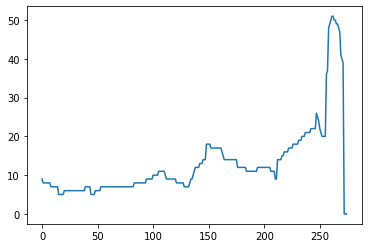

In [ ]:
plt.plot(dense_mat[0])

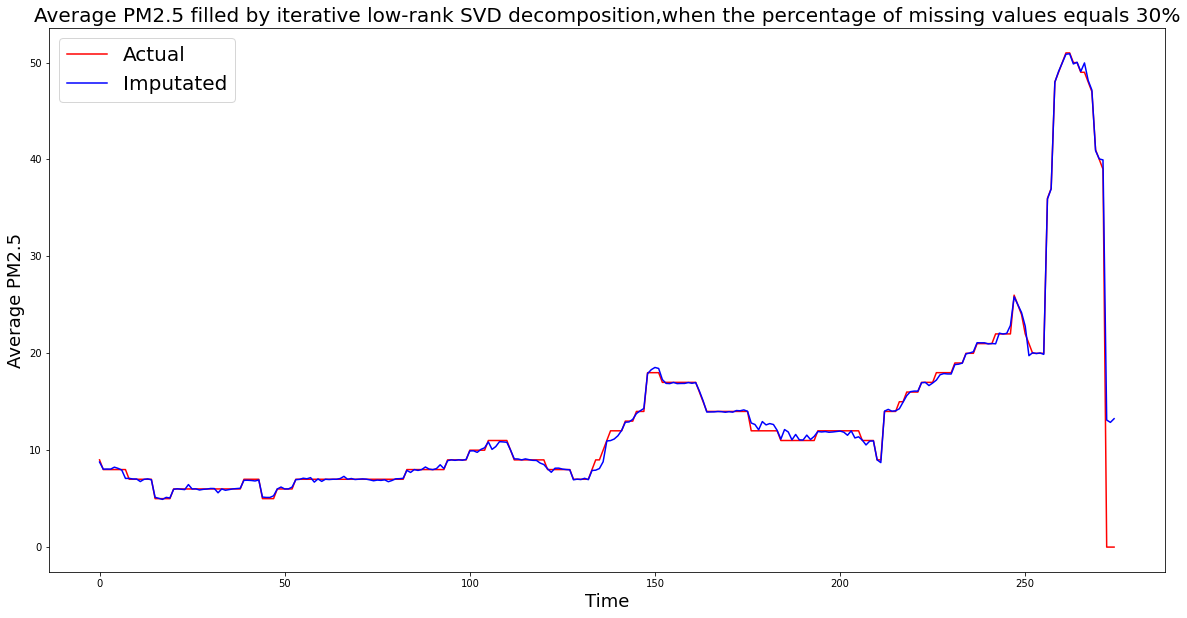

In [ ]:
plotTs(dense_mat[0], mat_hat[0], title='Average PM2.5 filled by iterative low-rank SVD decomposition,when the percentage of missing values equals 30%')

# BTMF

In [20]:
import numpy as np
from numpy.linalg import inv as inv
from numpy.random import normal as normrnd
from scipy.linalg import khatri_rao as kr_prod
from scipy.stats import wishart
from scipy.stats import invwishart
from numpy.linalg import solve as solve
from numpy.linalg import cholesky as cholesky_lower
from scipy.linalg import cholesky as cholesky_upper
from scipy.linalg import solve_triangular as solve_ut
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:

def mvnrnd_pre(mu, Lambda):
    src = normrnd(size = (mu.shape[0],))
    return solve_ut(cholesky_upper(Lambda, overwrite_a = True, check_finite = False), 
                    src, lower = False, check_finite = False, overwrite_b = True) + mu

def cov_mat(mat, mat_bar):
    mat = mat - mat_bar
    return mat.T @ mat

In [22]:
def sample_factor_w(tau_sparse_mat, tau_ind, W, X, tau, beta0 = 1, vargin = 0):
    """Sampling N-by-R factor matrix W and its hyperparameters (mu_w, Lambda_w)."""
    
    dim1, rank = W.shape
    W_bar = np.mean(W, axis = 0)
    temp = dim1 / (dim1 + beta0)
    var_W_hyper = inv(np.eye(rank) + cov_mat(W, W_bar) + temp * beta0 * np.outer(W_bar, W_bar))
    var_Lambda_hyper = wishart.rvs(df = dim1 + rank, scale = var_W_hyper)
    var_mu_hyper = mvnrnd_pre(temp * W_bar, (dim1 + beta0) * var_Lambda_hyper)
    
    if dim1 * rank ** 2 > 1e+8:
        vargin = 1
    
    if vargin == 0:
        var1 = X.T
        var2 = kr_prod(var1, var1)
        var3 = (var2 @ tau_ind.T).reshape([rank, rank, dim1]) + var_Lambda_hyper[:, :, None]
        var4 = var1 @ tau_sparse_mat.T + (var_Lambda_hyper @ var_mu_hyper)[:, None]
        for i in range(dim1):
            W[i, :] = mvnrnd_pre(solve(var3[:, :, i], var4[:, i]), var3[:, :, i])
    elif vargin == 1:
        for i in range(dim1):
            pos0 = np.where(sparse_mat[i, :] != 0)
            Xt = X[pos0[0], :]
            var_mu = tau[i] * Xt.T @ sparse_mat[i, pos0[0]] + var_Lambda_hyper @ var_mu_hyper
            var_Lambda = tau[i] * Xt.T @ Xt + var_Lambda_hyper
            W[i, :] = mvnrnd_pre(solve(var_Lambda, var_mu), var_Lambda)
    
    return W

In [23]:
def mnrnd(M, U, V):
    """
    Generate matrix normal distributed random matrix.
    M is a m-by-n matrix, U is a m-by-m matrix, and V is a n-by-n matrix.
    """
    dim1, dim2 = M.shape
    X0 = np.random.randn(dim1, dim2)
    P = cholesky_lower(U)
    Q = cholesky_lower(V)
    
    return M + P @ X0 @ Q.T

def sample_var_coefficient(X, time_lags):
    dim, rank = X.shape
    d = time_lags.shape[0]
    tmax = np.max(time_lags)
    
    Z_mat = X[tmax : dim, :]
    Q_mat = np.zeros((dim - tmax, rank * d))
    for k in range(d):
        Q_mat[:, k * rank : (k + 1) * rank] = X[tmax - time_lags[k] : dim - time_lags[k], :]
    var_Psi0 = np.eye(rank * d) + Q_mat.T @ Q_mat
    var_Psi = inv(var_Psi0)
    var_M = var_Psi @ Q_mat.T @ Z_mat
    var_S = np.eye(rank) + Z_mat.T @ Z_mat - var_M.T @ var_Psi0 @ var_M
    Sigma = invwishart.rvs(df = rank + dim - tmax, scale = var_S)
    
    return mnrnd(var_M, var_Psi, Sigma), Sigma

In [24]:
def sample_factor_x(tau_sparse_mat, tau_ind, time_lags, W, X, A, Lambda_x):
    """Sampling T-by-R factor matrix X."""
    
    dim2, rank = X.shape
    tmax = np.max(time_lags)
    tmin = np.min(time_lags)
    d = time_lags.shape[0]
    A0 = np.dstack([A] * d)
    for k in range(d):
        A0[k * rank : (k + 1) * rank, :, k] = 0
    mat0 = Lambda_x @ A.T
    mat1 = np.einsum('kij, jt -> kit', A.reshape([d, rank, rank]), Lambda_x)
    mat2 = np.einsum('kit, kjt -> ij', mat1, A.reshape([d, rank, rank]))
    
    var1 = W.T
    var2 = kr_prod(var1, var1)
    var3 = (var2 @ tau_ind).reshape([rank, rank, dim2]) + Lambda_x[:, :, None]
    var4 = var1 @ tau_sparse_mat
    for t in range(dim2):
        Mt = np.zeros((rank, rank))
        Nt = np.zeros(rank)
        Qt = mat0 @ X[t - time_lags, :].reshape(rank * d)
        index = list(range(0, d))
        if t >= dim2 - tmax and t < dim2 - tmin:
            index = list(np.where(t + time_lags < dim2))[0]
        elif t < tmax:
            Qt = np.zeros(rank)
            index = list(np.where(t + time_lags >= tmax))[0]
        if t < dim2 - tmin:
            Mt = mat2.copy()
            temp = np.zeros((rank * d, len(index)))
            n = 0
            for k in index:
                temp[:, n] = X[t + time_lags[k] - time_lags, :].reshape(rank * d)
                n += 1
            temp0 = X[t + time_lags[index], :].T - np.einsum('ijk, ik -> jk', A0[:, :, index], temp)
            Nt = np.einsum('kij, jk -> i', mat1[index, :, :], temp0)
        
        var3[:, :, t] = var3[:, :, t] + Mt
        if t < tmax:
            var3[:, :, t] = var3[:, :, t] - Lambda_x + np.eye(rank)
        X[t, :] = mvnrnd_pre(solve(var3[:, :, t], var4[:, t] + Nt + Qt), var3[:, :, t])

    return X

In [25]:

def sample_precision_tau(sparse_mat, mat_hat, ind):
    var_alpha = 1e-6 + 0.5 * np.sum(ind, axis = 1)
    var_beta = 1e-6 + 0.5 * np.sum(((sparse_mat - mat_hat) ** 2) * ind, axis = 1)
    return np.random.gamma(var_alpha, 1 / var_beta)

def sample_precision_scalar_tau(sparse_mat, mat_hat, ind):
    var_alpha = 1e-6 + 0.5 * np.sum(ind)
    var_beta = 1e-6 + 0.5 * np.sum(((sparse_mat - mat_hat) ** 2) * ind)
    return np.random.gamma(var_alpha, 1 / var_beta)

In [26]:
def compute_mape(var, var_hat):
    return np.sum(np.abs(var - var_hat) / var) / var.shape[0]

def compute_rmse(var, var_hat):
    return  np.sqrt(np.sum((var - var_hat) ** 2) / var.shape[0])

In [27]:
def BTMF(dense_mat, sparse_mat, init, rank, time_lags, burn_iter, gibbs_iter, option = "factor"):
    """Bayesian Temporal Matrix Factorization, BTMF."""
    
    dim1, dim2 = sparse_mat.shape
    d = time_lags.shape[0]
    W = init["W"]
    X = init["X"]
    if np.isnan(sparse_mat).any() == False:
        ind = sparse_mat != 0
        pos_obs = np.where(ind)
        pos_test = np.where((dense_mat != 0) & (sparse_mat == 0))
    elif np.isnan(sparse_mat).any() == True:
        pos_test = np.where((dense_mat != 0) & (np.isnan(sparse_mat)))
        ind = ~np.isnan(sparse_mat)
        pos_obs = np.where(ind)
        sparse_mat[np.isnan(sparse_mat)] = 0
    dense_test = dense_mat[pos_test]
    del dense_mat
    tau = np.ones(dim1)
    W_plus = np.zeros((dim1, rank))
    X_plus = np.zeros((dim2, rank))
    A_plus = np.zeros((rank * d, rank))
    temp_hat = np.zeros(len(pos_test[0]))
    show_iter = 200
    mat_hat_plus = np.zeros((dim1, dim2))
    for it in range(burn_iter + gibbs_iter):
        tau_ind = tau[:, None] * ind
        tau_sparse_mat = tau[:, None] * sparse_mat
        W = sample_factor_w(tau_sparse_mat, tau_ind, W, X, tau)
        A, Sigma = sample_var_coefficient(X, time_lags)
        X = sample_factor_x(tau_sparse_mat, tau_ind, time_lags, W, X, A, inv(Sigma))
        mat_hat = W @ X.T
        if option == "factor":
            tau = sample_precision_tau(sparse_mat, mat_hat, ind)
        elif option == "pca":
            tau = sample_precision_scalar_tau(sparse_mat, mat_hat, ind)
            tau = tau * np.ones(dim1)
        temp_hat += mat_hat[pos_test]
        if (it + 1) % show_iter == 0 and it < burn_iter:
            temp_hat = temp_hat / show_iter
            print('Iter: {}'.format(it + 1))
            print('MAPE: {:.6}'.format(compute_mape(dense_test, temp_hat)))
            print('RMSE: {:.6}'.format(compute_rmse(dense_test, temp_hat)))
            temp_hat = np.zeros(len(pos_test[0]))
            print()
        if it + 1 > burn_iter:
            W_plus += W
            X_plus += X
            A_plus += A
            mat_hat_plus += mat_hat
    mat_hat = mat_hat_plus / gibbs_iter
    W = W_plus / gibbs_iter
    X = X_plus / gibbs_iter
    A = A_plus / gibbs_iter
    print('Imputation MAPE: {:.6}'.format(compute_mape(dense_test, mat_hat[:, : dim2][pos_test])))
    print('Imputation RMSE: {:.6}'.format(compute_rmse(dense_test, mat_hat[:, : dim2][pos_test])))
    print()
    mat_hat[mat_hat < 0] = 0
    
    return mat_hat, W, X, A

## Random Missing tests 

In [28]:
import scipy.io

tensor = np.copy(outTensor)
random_matrix = np.random.rand(outTensor.shape[0],outTensor.shape[1])
random_tensor = np.random.rand(outTensor.shape[0],outTensor.shape[1], outTensor.shape[2])
dense_mat = tensor.reshape([tensor.shape[0], tensor.shape[1] * tensor.shape[2]])
missing_rate = 0.3

## Random missing (RM)
binary_mat = (np.round(random_tensor + 0.5 - missing_rate)
              .reshape([random_tensor.shape[0], random_tensor.shape[1] * random_tensor.shape[2]]))
sparse_mat = np.multiply(dense_mat, binary_mat)

In [ ]:
import time
start = time.time()
dim1, dim2 = sparse_mat.shape
rank = 80
time_lags = np.array([1, 2, 25])
init = {"W": 0.1 * np.random.randn(dim1, rank), "X": 0.1 * np.random.randn(dim2, rank)}
burn_iter = 1000
gibbs_iter = 200
mat_hat, W, X, A = BTMF(dense_mat, sparse_mat, init, rank, time_lags, burn_iter, gibbs_iter)
end = time.time()
print('Running time: %d seconds'%(end - start))

Iter: 200
MAPE: 0.0959972
RMSE: 7.25553

Iter: 400
MAPE: 0.0870878
RMSE: 7.08673

Iter: 600
MAPE: 0.0882807
RMSE: 7.15383

Iter: 800
MAPE: 0.0866328
RMSE: 6.90931

Iter: 1000
MAPE: 0.0878606
RMSE: 6.9072

Imputation MAPE: 0.0874646
Imputation RMSE: 7.00836

Running time: 469 seconds
